# Business Understanding

#### I will be using the Stack Overflow data from 2017 Developer survey to get better insights on the gender dive in the software development world.

##### My main questions are:

##### Part 1:

#### Q1 - What are the counts and percentages of genders from the survey?
#### Q2 - What are the developer types counts by gender?

##### Part #2:

#### Q3 - What are the gender percentages by developer type and the developer types percentage by gender?

##### Part #3

#### Q4 - Comparing salaries by gender, how do they compare in the US?
#### Q5 - Which are the lowest and highest salaries captured in the survey?
#### Q6 - Which countries have the lowest and highest average salaries by gender?

# Data Understanding
### Access and Explore

In [1]:
#import requiered libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#2017 data
df = pd.read_csv('./survey-results-public.csv')
#2017 schema
sf = pd.read_csv('./survey-results-schema.csv')

In [2]:
#let see how many fields/questions we have for the 2017 survey. We see there were 154 fields/question.
sf.shape

(154, 2)

In [3]:
#let see how many responses we have for the 2017 survey. We see 51,392 developers completed the survey.
df.shape

(51392, 154)

In [4]:
#let's view some data
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Prepare Data
### Cleanning data, missing value treatment

In [5]:
#get null counts for the Gender, DevelperType and Salary fields that we will be working with
df['Gender'].isna().sum() , df['DeveloperType'].isna().sum(), df['Salary'].isna().sum()

(16345, 15267, 38501)

In [6]:
#dropping rows with null gender, and normalize gender to Mail, Female or Other Gender
#then drop rows with no developer type or salary
#also, continue dropping rows with no country
df_gender = df.dropna(subset=['Gender'])
df_gender['Gender'] = df_gender.Gender.apply(lambda c: c if c in ['Male', 'Female'] else 'Other Gender')
df_dev = df_gender.dropna(subset=['DeveloperType'])
df_salary = df_gender.dropna(subset=['Salary'])
df_salary = df_salary[df_salary.Salary != 0]
df_salary_country = df_salary.dropna(subset=['Country']) 

C:\Users\ANAY006\AppData\Local\Temp\ipykernel_20340\2894384611.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gender['Gender'] = df_gender.Gender.apply(lambda c: c if c in ['Male', 'Female'] else 'Other Gender')


In [7]:
#get total responses with gender provided. 35,047 responses with gender
df_gender.shape

(35047, 154)

In [8]:
#split developer type values and view unique counts 
df_dev['DeveloperType_list'] = df_dev['DeveloperType'].str.split(';') 
split = df_dev["DeveloperType_list"].apply(pd.Series)
split = split.rename(columns = lambda x : 'val_' + str(x))
split = split.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)
split.melt(value_name="val").groupby(["val"]).size().sort_values()

C:\Users\ANAY006\AppData\Local\Temp\ipykernel_20340\2825064158.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dev['DeveloperType_list'] = df_dev['DeveloperType'].str.split(';')


val
Quality assurance engineer                                 930
Graphic designer                                           962
Machine learning specialist                                965
Graphics programming                                      1195
Other                                                     2112
Data scientist                                            2118
Embedded applications/devices developer                   2438
Developer with a statistics or mathematics background     3004
DevOps specialist                                         3083
Systems administrator                                     3116
Database administrator                                    3807
Mobile developer                                          5888
Desktop applications developer                            7797
Web developer                                            19112
dtype: int64

In [9]:
#merge gender values to developer types
split2 = df_dev["Gender"].apply(pd.Series)
df_gender_dev = pd.merge(split, split2, left_index=True, right_index=True)
df_gender_dev = df_gender_dev.rename(columns={0: 'Gender'})

In [10]:
#check again for missing genders.No missing genders.
df_gender_dev['Gender'].isna().sum()

0

# Part #1: 
# Q1- What are the counts and percentages of genders from the survey?
# Q2- What are the developer types counts by gender?

### Analysis 

In [11]:
# Q1 - get gender counts
df_gender.groupby(['Gender'])['Gender'].count()

Gender
Female           2600
Male            31589
Other Gender      858
Name: Gender, dtype: int64

In [12]:
# Q1 - get gender percentages
df_gender.groupby('Gender')['Gender'].count().rename("percentage").transform(lambda x: x/x.sum())

Gender
Female          0.074186
Male            0.901332
Other Gender    0.024481
Name: percentage, dtype: float64

In [13]:
# Q2 - get counts by gender and developer type
df_gender_dev_type=(df_gender_dev.melt(id_vars=['Gender'],value_name="val").groupby(["Gender","val"]).size()).groupby(["Gender","val"]).sum()

#convert series to data franme and rename count column
df_gender_dev = df_gender_dev_type.to_frame().reset_index()
df_gender_dev = df_gender_dev.rename(columns={0: 'total'})

In [14]:
#view counts
df_gender_dev

,Gender,val,total
0,Female,Data scientist,135
1,Female,Database administrator,161
2,Female,Desktop applications developer,401
3,Female,DevOps specialist,98
4,Female,Developer with a statistics or mathematics bac...,218
5,Female,Embedded applications/devices developer,87
6,Female,Graphic designer,69
7,Female,Graphics programming,53
8,Female,Machine learning specialist,54
9,Female,Mobile developer,355


In [15]:
# get top 3 developer types per gender
print( df_gender_dev.sort_values(by=['Gender','total'], ascending= [True, False]).groupby('Gender').nth[0,1,2])

                                         val  total
Gender                                             
Female                         Web developer   1327
Female        Desktop applications developer    401
Female                      Mobile developer    355
Male                           Web developer  17399
Male          Desktop applications developer   7242
Male                        Mobile developer   5406
Other Gender                   Web developer    386
Other Gender  Desktop applications developer    154
Other Gender                Mobile developer    127


### Visualization

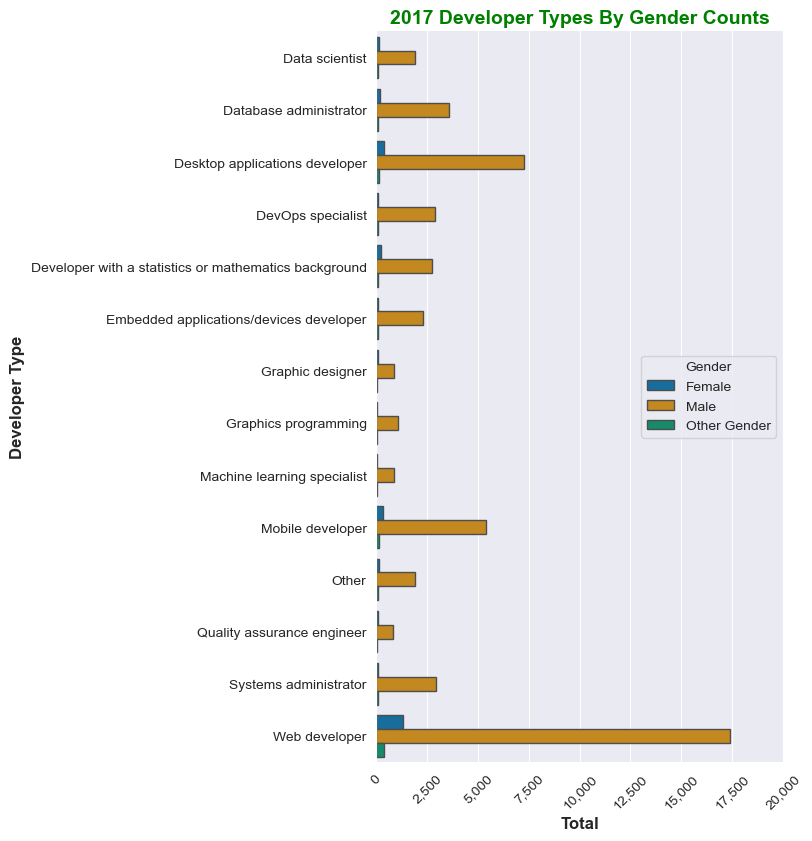

In [16]:
# Q2- 2017 Developer Types By Gender Counts bar graph
sns.set_style("darkgrid")

gv = sns.catplot(data=df_gender_dev, x='total', y='val', hue='Gender', kind='bar', legend=False,
                palette='colorblind', edgecolor='.3', height=8, errorbar=None);
    
for ax in gv.axes.flat:
        xlabels = [( ('{:,.0f}'.format(x)) if x != 0 else '0' ) for x in ax.get_xticks()]    

plt.title("2017 Developer Types By Gender Counts", fontsize=14, color="green", weight='bold')
plt.legend(title='Gender', labels=['Female','Male','Other Gender'], loc = 'center right')
gv.set_ylabels('Developer Type', fontsize=12, weight='bold')
gv.set_xlabels('Total', fontsize=12, weight='bold')
gv.set_xticklabels(xlabels, rotation = 45);

plt.savefig('2017devgencnt.png',dpi=300, bbox_inches = "tight")

# Part #2: 
# Q3 - What are the gender percentages by developer type and the developer types percentage by gender?

### Analysis

In [17]:
# Q3- get percentages of gender by developer type
df_gender_dev_temp2=(df_gender_dev.groupby("val").apply(lambda my_df: my_df["total"] / my_df["total"].sum())).to_frame()
df_gender_dev_temp2.reset_index(inplace=True)
df_gender_dev_temp2.set_index('level_1')

df_gender_dev_perc2=pd.merge(df_gender_dev,df_gender_dev_temp2, left_index=True, right_on='level_1')

df_gender_dev_perc2 = df_gender_dev_perc2.drop(df_gender_dev_perc2.columns[[3, 4]], axis=1) 
df_gender_dev_perc2 = df_gender_dev_perc2.rename(columns={'val_x': 'val','total_y':'gender_perc','total_x':'total'})
df_gender_dev_perc2['gender_perc'] = df_gender_dev_perc2['gender_perc']*100
df_gender_dev_perc2

,Gender,val,total,gender_perc
0,Female,Data scientist,135,6.373938
3,Female,Database administrator,161,4.229052
6,Female,Desktop applications developer,401,5.143004
9,Female,DevOps specialist,98,3.178722
12,Female,Developer with a statistics or mathematics bac...,218,7.256991
15,Female,Embedded applications/devices developer,87,3.568499
18,Female,Graphic designer,69,7.172557
21,Female,Graphics programming,53,4.435146
24,Female,Machine learning specialist,54,5.595855
27,Female,Mobile developer,355,6.029212


In [18]:
# Q3- now, obtain percentages of developer types by gender
df_gender_dev_temp=(df_gender_dev.groupby("Gender").apply(lambda my_df: my_df["total"] / my_df["total"].sum())).to_frame()
df_gender_dev_temp.reset_index(inplace=True)
df_gender_dev_perc=pd.merge(df_gender_dev,df_gender_dev_temp, left_index=True, right_index=True)
df_gender_dev_perc = df_gender_dev_perc.drop(df_gender_dev_perc.columns[[3, 4]], axis=1) 
df_gender_dev_perc = df_gender_dev_perc.rename(columns={'Gender_x': 'Gender','total_y':'gender_perc','total_x':'total'})
df_gender_dev_perc['gender_perc'] = df_gender_dev_perc['gender_perc']*100
df_gender_dev_perc

,Gender,val,total,gender_perc
0,Female,Data scientist,135,4.165381
1,Female,Database administrator,161,4.967603
2,Female,Desktop applications developer,401,12.372724
3,Female,DevOps specialist,98,3.023758
4,Female,Developer with a statistics or mathematics bac...,218,6.726319
5,Female,Embedded applications/devices developer,87,2.684357
6,Female,Graphic designer,69,2.128973
7,Female,Graphics programming,53,1.635298
8,Female,Machine learning specialist,54,1.666152
9,Female,Mobile developer,355,10.953409


## Visualization

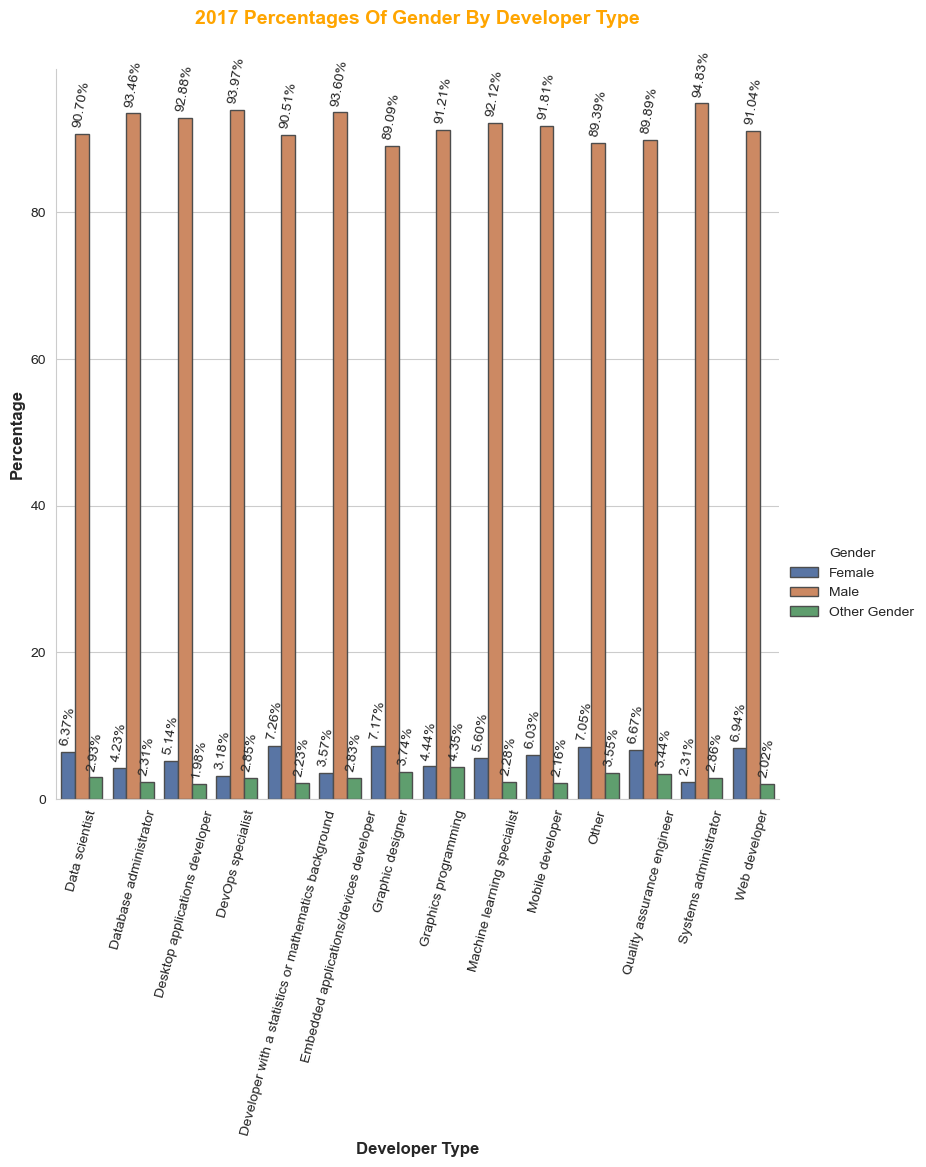

In [19]:
# Q2 -2017 Percentages Of Gender By Developer Type bar graph
sns.set_style('whitegrid')

gv= sns.catplot(data=df_gender_dev_perc2, x='val', y='gender_perc', hue='Gender', kind='bar',
                palette='deep', edgecolor='.3', height=8, aspect=1, errorbar=None);
    
for ax in gv.axes.flat:
        xlabels = [( (x))  for x in ax.get_xticklabels()]     
        
# extract the matplotlib axes_subplot objects from the FacetGrid
ax = gv.facet_axis(0, 0)

for c in ax.containers:
    labels = [f'{(v.get_height()):,.2f}%' for v in c]
    ax.bar_label(c, labels=labels, padding=4, rotation=80)         
    
plt.title("2017 Percentages Of Gender By Developer Type", fontsize=14, color="orange",y=1.05,x=.5, weight='bold')
gv.set_ylabels('Percentage', fontsize=12, weight='bold')
gv.set_xlabels('Developer Type', fontsize=12, weight='bold')
gv.set_xticklabels(xlabels, rotation = 75);

plt.savefig('2017gendevper.png',dpi=300, bbox_inches = "tight")

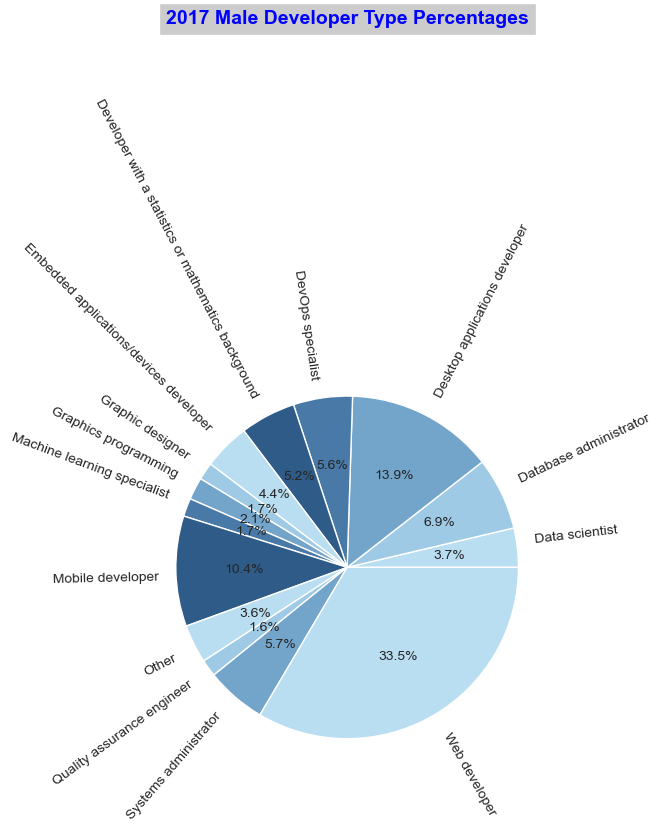

In [20]:
#Data for male developer types
labels = df_gender_dev_perc.loc[df_gender_dev_perc['Gender'] == 'Male']["val"]
value = df_gender_dev_perc.loc[df_gender_dev_perc['Gender'] == 'Male']["total"]
colors = ["#B9DDF1", "#9FCAE6", "#73A4CA", "#497AA7", "#2E5B88","#B9DDF1", "#9FCAE6", "#73A4CA", "#497AA7", "#2E5B88","#B9DDF1", "#9FCAE6", "#73A4CA"]

# 2017 Male Developer Type Percentages Pie chart
fig, ax = plt.subplots()
plt.subplots_adjust(top=.9)
plt.axis('equal')
plt.tight_layout()
plt.title("2017 Male Developer Type Percentages", fontsize=14, color="Blue", bbox={'facecolor':'0.8', 'pad':5},y=1.75,x=.5, weight='bold')
ax.pie(value, labels = labels, colors = colors, wedgeprops = {"linewidth": 1, "edgecolor": "white"},rotatelabels = True,autopct = '%1.1f%%');

plt.savefig('2017maledevper.png',dpi=300, bbox_inches = "tight")

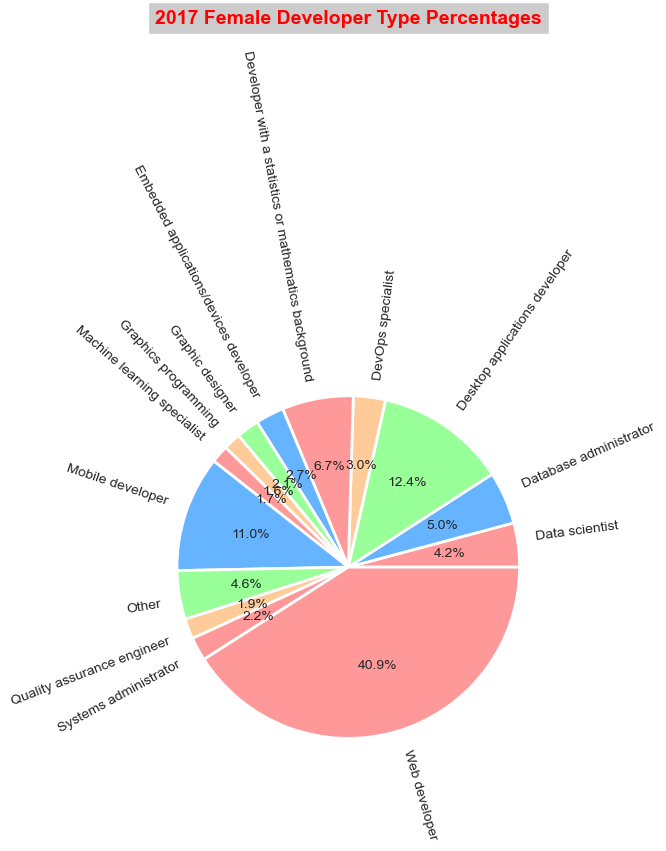

In [21]:
# Data for female developer types
labels = df_gender_dev_perc.loc[df_gender_dev_perc['Gender'] == 'Female']["val"]
value =df_gender_dev_perc.loc[df_gender_dev_perc['Gender'] == 'Female']["total"]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ff9999','#66b3ff','#99ff99','#ffcc99','#ff9999','#66b3ff','#99ff99','#ffcc99','#ff9999']

# 2017 Female Developer Type Percentages Pie chart
fig, ax = plt.subplots()
plt.subplots_adjust(top=.9)
plt.axis('equal')
plt.tight_layout()
plt.title("2017 Female Developer Type Percentages", fontsize=14, color="Red", bbox={'facecolor':'0.8', 'pad':5},y=1.75,x=.5, weight='bold')
ax.pie(value, labels = labels, colors = colors, wedgeprops = {"linewidth": 2, "edgecolor": "white"},rotatelabels = True,autopct = '%1.1f%%');

plt.savefig('2017femaledevper.png',dpi=300, bbox_inches = "tight")

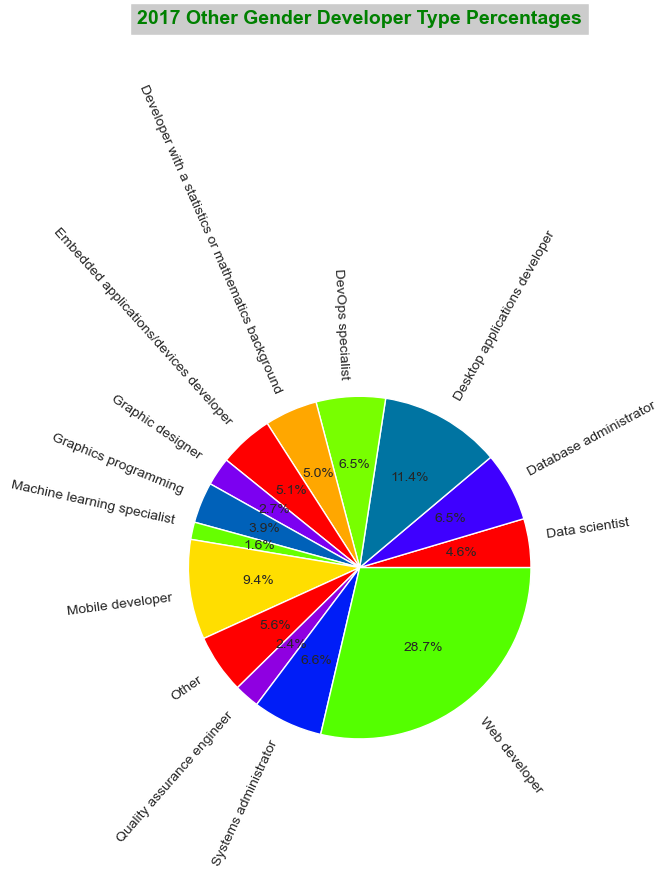

In [22]:
# Data for other gender developer types
labels =df_gender_dev_perc.loc[df_gender_dev_perc['Gender'] == 'Other Gender']["val"]
value =df_gender_dev_perc.loc[df_gender_dev_perc['Gender'] == 'Other Gender']["total"]
cmap = plt.cm.prism
colors = cmap(np.linspace(0., 1., len(labels)))

# 2017 Other Gender Developer Type Percentages Pie chart
fig, ax = plt.subplots()
plt.subplots_adjust(top=.9)
plt.axis('equal')
plt.tight_layout()
plt.title("2017 Other Gender Developer Type Percentages", fontsize=14, color="Green", bbox={'facecolor':'0.8', 'pad':5},y=1.75,x=.5, weight='bold')
ax.pie(value, labels = labels, colors = colors, wedgeprops = {"linewidth": 1, "edgecolor": "white"},rotatelabels = True,autopct = '%1.1f%%');

plt.savefig('2017othergendevper.png',dpi=300, bbox_inches = "tight")

# Part #3: 
# Q4 - Comparing salaries by gender, how do they compare in the US? 
# Q5 - Which are the lowest and highest salaries captured in the survey? 
# Q6 - Which countries have the lowest and highest average salaries by gender?

### Analysis

In [23]:
# get salary data and gender
df_gender_sal = df_salary.get(['Gender','Salary'])

# average salary by gender
df_gender_sal.groupby(['Gender']).mean()

,Salary
Gender,
Female,58154.931777
Male,57007.183808
Other Gender,61671.656678


In [24]:
#max salary by gender
df_gender_sal.groupby(['Gender']).max()

,Salary
Gender,
Female,195000.0
Male,197000.0
Other Gender,190000.0


In [25]:
#min salary by gender
df_gender_sal.groupby(['Gender']).min()

,Salary
Gender,
Female,0.014682
Male,0.044046
Other Gender,100.000000


In [26]:
#salaries by country and gender
df_salary_country= df_salary_country.get(['Gender','Salary','Country'])
df_sal_cntry_max_min=df_salary_country.groupby('Country')['Salary'].min().sort_values().to_frame().head()
df_sal_cntry_max_min=df_sal_cntry_max_min.append(df_salary_country.groupby('Country')['Salary'].max().sort_values(ascending=False).to_frame().head())
df_sal_cntry_max_min.reset_index()
df_sal_cntry_max_min

C:\Users\ANAY006\AppData\Local\Temp\ipykernel_20340\1715049788.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sal_cntry_max_min=df_sal_cntry_max_min.append(df_salary_country.groupby('Country')['Salary'].max().sort_values(ascending=False).to_frame().head())


,Salary
Country,
India,0.014682
Australia,0.757576
Indonesia,1.495774
Chile,1.715774
United Arab Emirates,2.179837
United States,197000.000000
United Kingdom,193750.000000
Switzerland,190000.000000
Australia,181818.181818


In [27]:
# Q4 - salaries in the usa
df_salary_country.loc[df_salary_country['Country'] == 'United States']

,Gender,Salary,Country
17,Male,130000.0,United States
25,Male,175000.0,United States
70,Male,65000.0,United States
72,Male,120000.0,United States
76,Male,96283.0,United States
...,...,...,...
51312,Male,120000.0,United States
51315,Male,140000.0,United States
51319,Male,105000.0,United States
51387,Male,58000.0,United States


In [28]:
# avg salary by gender in the usa
df_salary_country.loc[df_salary_country['Country'] == 'United States'].groupby(['Gender']).mean()

C:\Users\ANAY006\AppData\Local\Temp\ipykernel_20340\1498064994.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_salary_country.loc[df_salary_country['Country'] == 'United States'].groupby(['Gender']).mean()


,Salary
Gender,
Female,89602.362319
Male,97074.740812
Other Gender,100549.025316


In [29]:
# total countries
df_salary_country['Country'].nunique()

131

In [30]:
# Q5 - get 5 lowest Developer Country Average Salaries By Gender using the avg_salaries function

def avg_salaries(df1,n,sort):
     '''Developer Country Average Salaries By Gender

    Parameters:
    argument1 (df): dataframe
    argument2 (n):  number of results returned by gender/counry
    argument3 (sort): True = ascending, False= descending

    Returns:
    dataframe with results

    '''     
        
     df_avg = df1.groupby(['Gender','Country'])['Salary'].mean().sort_values().to_frame()
     df_avg.reset_index()
     df_avg= df_avg.sort_values(by=['Gender','Salary'], ascending=[True,sort])
     df_avg = df_avg.groupby('Gender', as_index=False).nth[:n]
     df_avg.reset_index(inplace=True)
     return df_avg

df_sal_cntry_min_mean=avg_salaries(df_salary_country,5,True)
df_sal_cntry_min_mean

,Gender,Country,Salary
0,Female,Ghana,574.000000
1,Female,Vietnam,650.000000
2,Female,Morocco,860.215054
3,Female,Myanmar,1042.300009
4,Female,Malaysia,1566.209041
5,Male,Cambodia,500.000000
6,Male,Cuba,560.000000
7,Male,Yemen,1000.000000
8,Male,Kazakhstan,1000.000000
9,Male,Taiwan,1100.000000


In [31]:
#  Q6 - get 5 highest Developer Country Average Salaries By Gender using the avg_salaries function
df_sal_cntry_max_mean= avg_salaries(df_salary_country,5,False)
df_sal_cntry_max_mean

,Gender,Country,Salary
0,Female,United States,89602.362319
1,Female,Switzerland,86950.000000
2,Female,Norway,86124.401914
3,Female,I prefer not to say,85000.000000
4,Female,Iceland,80645.161290
5,Male,Virgin Islands (USA),175000.000000
6,Male,U.S. Minor Outlying Islands,136000.000000
7,Male,Uganda,120000.000000
8,Male,Kuwait,115200.000000
9,Male,Puerto Rico,114000.000000


### Visualization

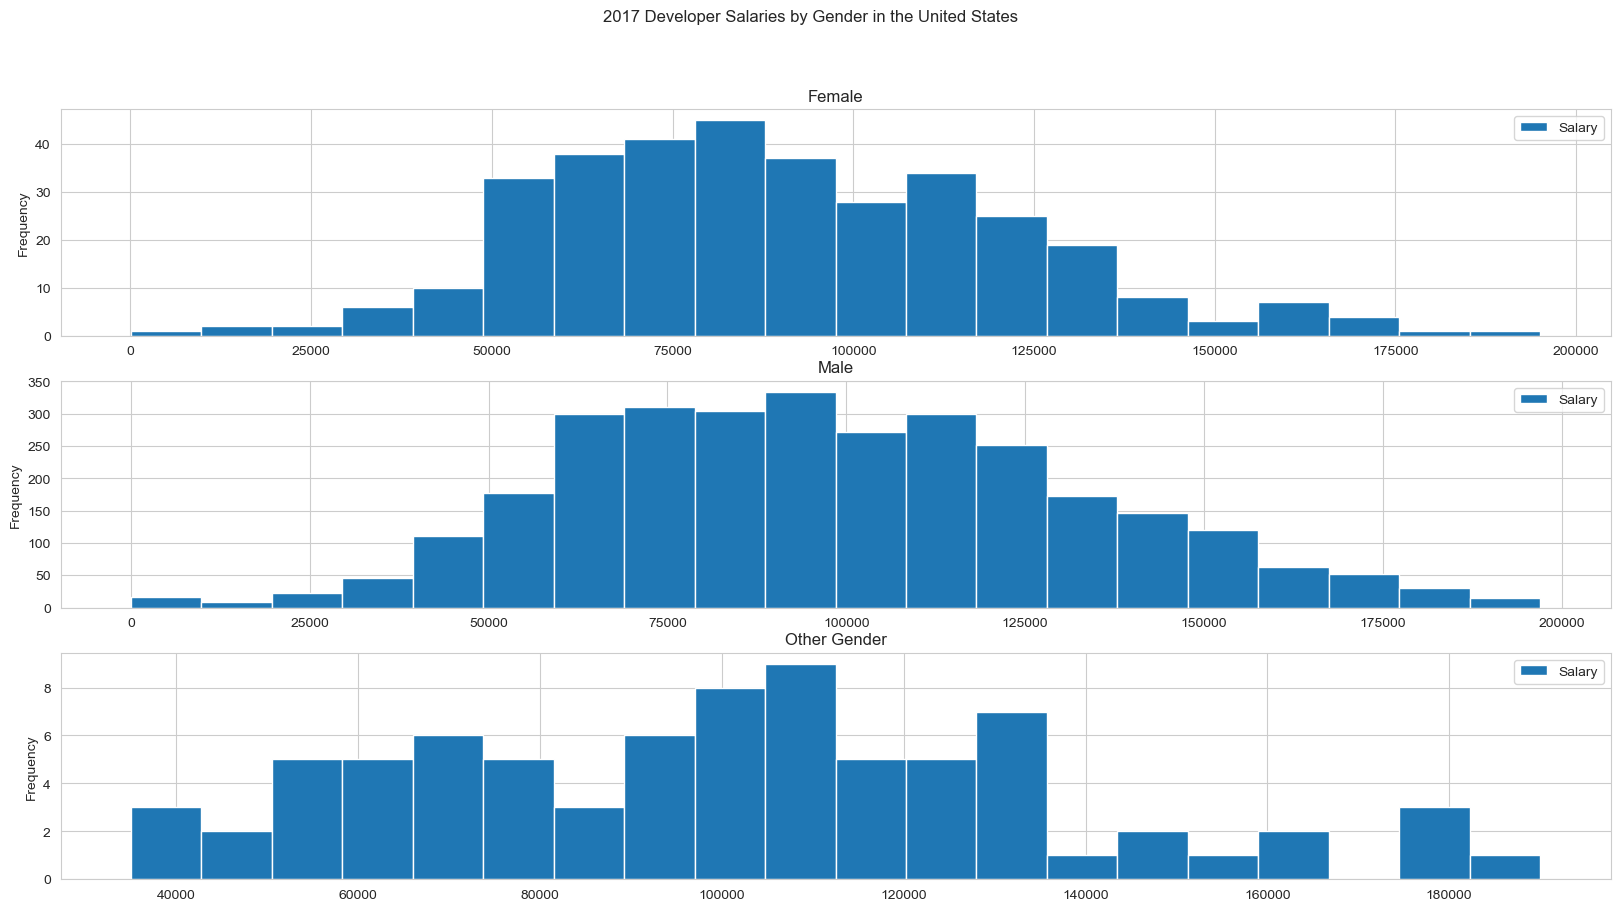

In [32]:
# Q4 -salaries by gender histogram

ax =df_salary_country.loc[df_salary_country['Country'] == 'United States'].plot.hist(column=["Salary"], by="Gender",bins=20, alpha=1, figsize=(20, 10),title='2017 Developer Salaries by Gender in the United States',histtype='barstacked'); 
                   
plt.savefig('2017devsalgenus.png',dpi=300, bbox_inches = "tight")

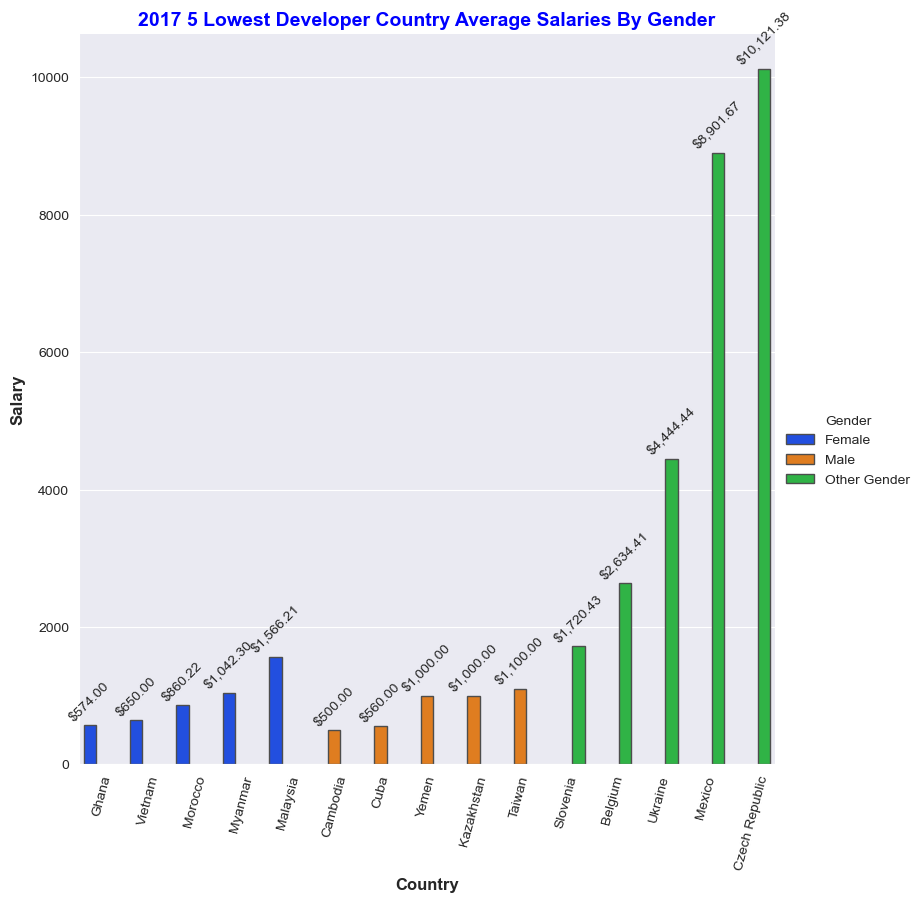

In [33]:
# Q5 - 2017 5 Lowest Developer Country Average Salaries By Gender bar graph
sns.set_style('darkgrid')
gv = sns.catplot(data=df_sal_cntry_min_mean, x='Country', y='Salary', hue='Gender', kind='bar',
                palette='bright', edgecolor='.3', height=8, aspect=1, errorbar=None);
    
for ax in gv.axes.flat:
        xlabels = [( (x))  for x in ax.get_xticklabels()]
       
#extract the matplotlib axes_subplot objects from the FacetGrid
ax = gv.facet_axis(0, 0) 

#iterate through the axes containers
for c in ax.containers:
    labels = [f'${(v.get_height()):,.2f}' for v in c]
    ax.bar_label(c, labels=labels, padding=1, rotation=45)
    
plt.title("2017 5 Lowest Developer Country Average Salaries By Gender", fontsize=14, color="blue", weight='bold')
gv.set_ylabels('Salary', fontsize=12, weight='bold')
gv.set_xlabels('Country', fontsize=12, weight='bold')
gv.set_xticklabels(xlabels, rotation = 75);

plt.savefig('2017lowdevctyavgsalgen.png',dpi=300, bbox_inches = "tight")

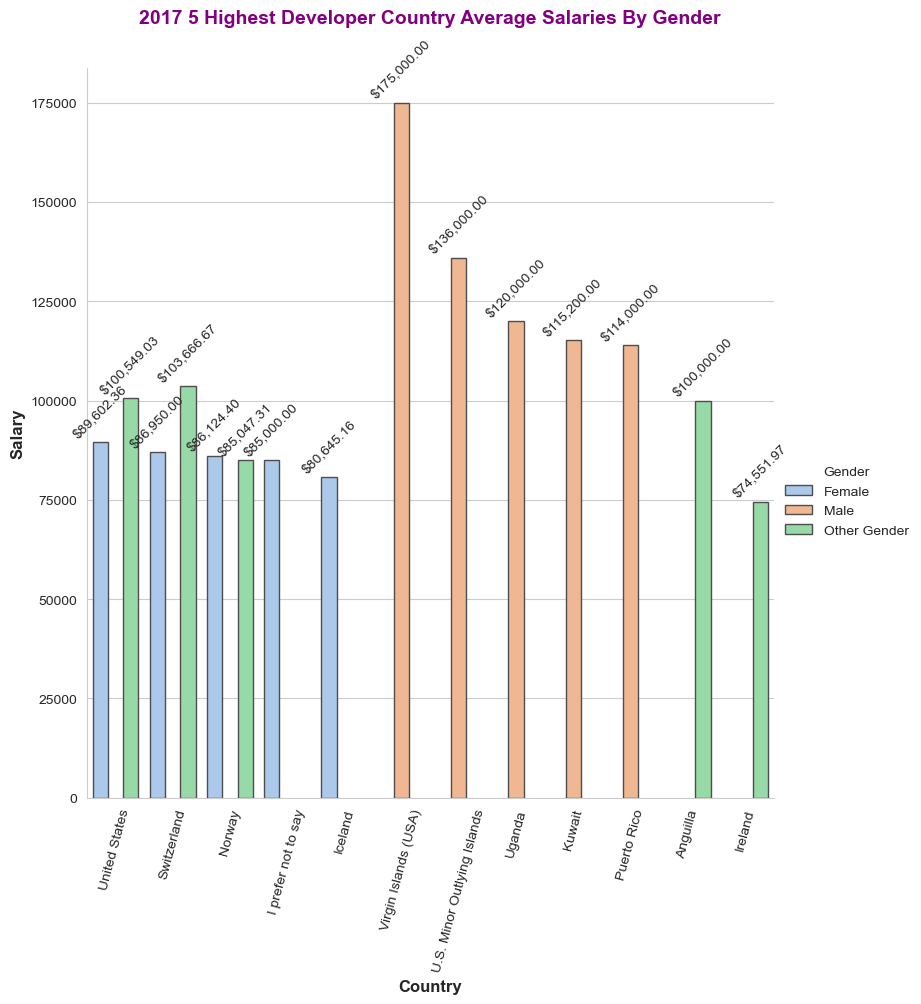

In [34]:
# Q6 -2017 5 Highest Developer Country Average Salaries By Gende bar graph
sns.set_style('whitegrid')
gv = sns.catplot(data=df_sal_cntry_max_mean, x='Country', y='Salary', hue='Gender', kind='bar',
                palette='pastel', edgecolor='.3', height=8, aspect=1, errorbar=None);
    
for ax in gv.axes.flat:
        xlabels = [( (x))  for x in ax.get_xticklabels()]
        
# extract the matplotlib axes_subplot objects from the FacetGrid
ax = gv.facet_axis(0, 0)

# iterate through the axes containers
for c in ax.containers:
    labels = [f'${(v.get_height()):,.2f}' for v in c]
    ax.bar_label(c, labels=labels, padding=1, rotation=45)        
    
plt.title("2017 5 Highest Developer Country Average Salaries By Gender", fontsize=14, color="purple",y=1.05,x=.5, weight='bold')
gv.set_ylabels('Salary', fontsize=12, weight='bold')
gv.set_xlabels('Country', fontsize=12, weight='bold')
gv.set_xticklabels(xlabels, rotation = 75);

plt.savefig('2017highdevctyavgsalgen.png',dpi=300, bbox_inches = "tight")

# Evaluation and Findings

In 2017, the development world was still highly dominated by men, 90.13%. It seems it was similar back around 1993 when I started coding.

The gender salary gap in the US is difficult to measure with high accuracy with this survey’s data but we can see a persistent gap between men, women and other genders that still reflected in 2017.

In addition, we could determine which countries average salaries are the highest and the lowest. The gender pay gaps appear to reflect in different degrees.

It will be interesting to compare these results with results from more recent surveys. Could they be slowly changing, rapidly changing or having stable results?